In [1]:
import os
os.chdir("/data/t-achetan/adv_geom/src/")

import torch
import numpy as np
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

from expB.learn_mfld_distance import test
from expB.myNNs import *
from datagen.real.mnist import MNISTManifolds

23-06-2022 07:49:44 -- [I] faiss.loader | [loader.py:54 -             <module>()] >> Loading faiss with AVX2 support.
23-06-2022 07:49:44 -- [I] faiss.loader | [loader.py:56 -             <module>()] >> Successfully loaded faiss with AVX2 support.


In [20]:
model_fn = "/mnt/t-achetan/expC_dist_learner_for_adv_ex/mnist_test/mnist_18_val_only_moreoffmfldv3_nn10_highmn_nonormpts/3/models/ckpt.pth"
model = MTMLPwithNormalisation(input_size=784, output_size=2, hidden_sizes=[512] * 8, weight_norm=False, use_relu=False, use_tanh=False)
model.load_state_dict(torch.load(model_fn)["model_state_dict"])

data_dir = "/mnt/t-achetan/expC_dist_learner_for_adv_ex/mnist_test/mnist_18_val_only_moreoffmfldv3_nn10_highmn_nonormpts/data/val/"
dataset = MNISTManifolds()
dataset.load_data(data_dir)

dataloader = DataLoader(dataset, shuffle=False, batch_size=8192, num_workers=8)
device = torch.device("cuda:0")
mse, mse_on_mfld, all_targets, all_logits = test(model, dataloader,device, feature_name="points", target_name="normed_actual_distances")


23-06-2022 07:53:09 -- [I] root | [manifolds.py:580 -            load_data()] >> [MNISTManifolds]: data attribute (use_labels) loaded from file: /mnt/t-achetan/expC_dist_learner_for_adv_ex/mnist_test/mnist_18_val_only_moreoffmfldv3_nn10_highmn_nonormpts/data/val/use_labels.pkl
23-06-2022 07:53:09 -- [I] root | [manifolds.py:580 -            load_data()] >> [MNISTManifolds]: data attribute (class_to_idx) loaded from file: /mnt/t-achetan/expC_dist_learner_for_adv_ex/mnist_test/mnist_18_val_only_moreoffmfldv3_nn10_highmn_nonormpts/data/val/class_to_idx.pkl
23-06-2022 07:53:09 -- [I] root | [manifolds.py:580 -            load_data()] >> [MNISTManifolds]: data attribute (norm_factor) loaded from file: /mnt/t-achetan/expC_dist_learner_for_adv_ex/mnist_test/mnist_18_val_only_moreoffmfldv3_nn10_highmn_nonormpts/data/val/norm_factor.pkl
23-06-2022 07:53:09 -- [I] root | [manifolds.py:580 -            load_data()] >> [MNISTManifolds]: data attribute (on_mfld_pts) loaded from file: /mnt/t-achetan

In [28]:
th_analyze = np.arange(0.1, 1, 0.1)
accs = np.zeros(th_analyze.shape[0])

for i in range(len(th_analyze)):
    
    pred_class_labels = torch.zeros(dataset.all_points.shape[0])
    true_class_labels = torch.zeros(dataset.all_points.shape[0])
    
    pred_distances, pred_class_labels = all_logits.min(dim=1)
    true_distances, true_class_labels = all_targets.min(dim=1)
    
    pred_class_labels[pred_distances > th_analyze[i]] = 2
    true_class_labels[true_distances > th_analyze[i]] = 2
    
    clf_report = classification_report(true_class_labels, pred_class_labels, output_dict=True)
    
    accs[i] = clf_report["accuracy"]
    

(0, 1.02)

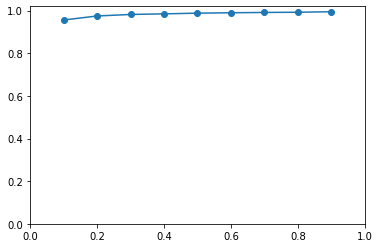

In [34]:
plt.plot(th_analyze, accs, marker="o")
plt.xlim(0, 1.0)
plt.ylim(0, 1.02)

In [35]:
accs

array([0.95590327, 0.97486961, 0.98198198, 0.98482693, 0.98814604,
       0.99004267, 0.99146515, 0.99241347, 0.99478426])